In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [6]:
folders = glob('Datasets/train/*')

In [7]:
x = Flatten()(resnet152V2.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [9]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 307s 5s/step - loss: 1.5065 - accuracy: 0.8170 - val_loss: 0.3026 - val_accuracy: 0.9444
Epoch 2/10
61/61 [==============================] - 214s 4s/step - loss: 0.4571 - accuracy: 0.9236 - val_loss: 0.0835 - val_accuracy: 0.9444
Epoch 3/10
61/61 [==============================] - 210s 3s/step - loss: 0.2957 - accuracy: 0.9508 - val_loss: 0.4693 - val_accuracy: 0.9444
Epoch 4/10
61/61 [==============================] - 219s 4s/step - loss: 0.3733 - accuracy: 0.9462 - val_loss: 0.6748 - val_accuracy: 0.9444
Epoch 5/10
61/61 [==============================] - 270s 4s/step - loss: 0.2975 - accuracy: 0.9590 - val_loss: 0.2020 - val_accuracy: 0.8889
Epoch 6/10
61/61 [==============================] - 308s 5s/step - loss: 0.3464 - accuracy: 0.9518 - val_loss: 1.4643 - val_accuracy: 0.8889
Epoch 7/10
61/61 [==============================] - 236s 4s/step - loss: 0.2654 - accuracy: 0.9662 - val_loss: 0.3873 - val_accuracy: 0.9444
Epoch 8/10
61

In [15]:
import matplotlib.pyplot as plt

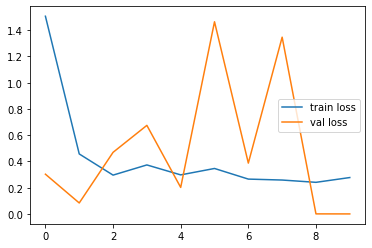

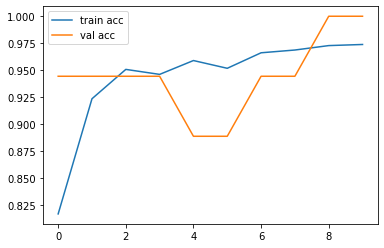

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

C:\Users\ayshwarya\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [15]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [22]:
model=load_model('model_resnet152V2.h5')

In [46]:
img=image.load_img('C:\\Users\\ayshwarya\\Downloads\\cotton disease\\datasets\\test\\fresh cotton plant\\dsd (228).jpg',target_size=(224, 224))

In [47]:
x=image.img_to_array(img)

In [48]:
x=np.expand_dims(x, axis=0)

In [49]:
img_data=preprocess_input(x)

In [50]:
classes=model.predict(img_data)

In [51]:
result=classes[0][0]

In [53]:
if result==0:
    print("The leaf is freash cotton plant")
elif result==1:
    print("The leaf is diseased cotton leaf")
elif result==2:
    print("The leaf is fresh cotton leaf")
else:
    print("The leaf is fresh cotton plant")

The leaf is freash cotton plant


In [34]:
img=image.load_img('C:\\Users\\ayshwarya\\Downloads\\cotton disease\\datasets\\train\\diseased cotton plant\\dd (53)_iaip.jpg',target_size=(224, 224))

In [35]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=classes[0][0]

In [37]:
if result==0:
    print("The leaf is diseased cotton plant")
elif result==1:
    print("The leaf is diseased cotton leaf")
elif result==2:
    print("The leaf is fresh cotton leaf")
else:
    print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
